<a href="https://colab.research.google.com/github/marcocaggioni/microrheology-test/blob/master/test%20-%20quilt%20data_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot
from matplotlib.pyplot import *
import os
import glob
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

import pandas as pd

from ipywidgets.widgets import interact, interactive, fixed
from ipywidgets import widgets
from scipy import fftpack
from IPython.display import display
from PIL import Image
import pims
import scipy.optimize as optimization
import pandas as pd
import pymongo
import gridfs

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1736704/45929032 bytes (3.8%)5619712/45929032 bytes (12.2%)9322496/45929032 bytes (20.3%)13107200/45929032 bytes (28.5%)16973824/45929032 bytes (37.0%)20529152/45929032 bytes (44.7%)24510464/45929032 bytes (53.4%)28393472/45929032 bytes (61.8%)32292864/45929032 bytes (70.3%)36151296/45929032 bytes (78.7%)39985152/45929032 bytes (87.1%)43794432/45929032 bytes (95.4%)

In [8]:
!quilt install marcocaggioni/microrheology

100% 78.7M/78.7M [00:01<00:00, 45.2MB/s]


# Example video from quilt

In [0]:
from quilt.data.marcocaggioni import microrheology

In [0]:
pims_video=pims.Cine(microrheology.n400nm_100dil_water_01umpix_100fps_short())
pims_video.info=microrheology.n400nm_100dil_water_01umpix_100fps_short._meta['info']

Frame([[133, 131, 129, ..., 125, 125, 125],
       [117, 118, 119, ..., 121, 117, 115],
       [119, 123, 122, ..., 123, 123, 123],
       ...,
       [129, 128, 129, ..., 125, 127, 129],
       [124, 127, 125, ..., 124, 124, 124],
       [116, 117, 117, ..., 116, 115, 115]], dtype=uint8)
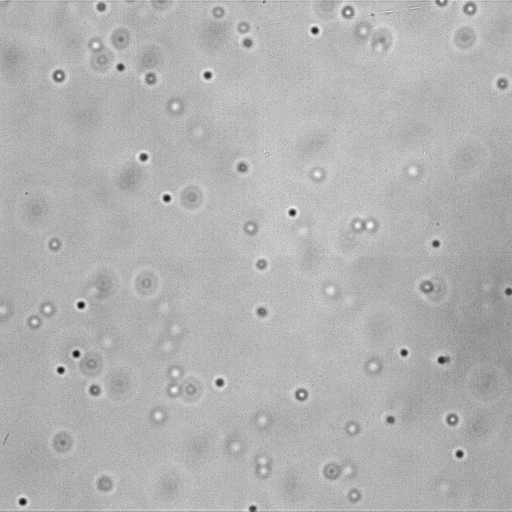

In [11]:
pims_video[10]

In [0]:
#Define simple video browser with ipywidgets

def browse_images_ptm(video):
    frames=len(video)
    interval=video.info['interval']
    muperpix=video.info['muperpix']
    filename=video.info['filename']
    pixpermu=1/muperpix
    
    def view_image(framenum):
        pyplot.figure(figsize=(6,6))
        toplot=video[framenum]
        pyplot.title(str(' time: ' + str(framenum*interval) + ' s'))
        pyplot.imshow(toplot)
        pyplot.set_cmap('gray')
        pyplot.axis('off')
        
    w=widgets.interactive(view_image, framenum=(0,frames-21))
    return w


In [13]:
browse_images_ptm(pims_video)

interactive(children=(IntSlider(value=139, description='framenum', max=279), Output()), _dom_classes=('widget-…